Import the necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\User\AppData\Local\Temp\ipykernel_16264\555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Cleaning the dataset credit to: https://www.kaggle.com/code/hainescity/top-spotify-songs-cleaning-and-eda

In [6]:
df = pd.read_csv('Popular_Spotify_Songs.csv', encoding = 'latin-1')
# Check first 5 lines

df.head()
# Dataframe summary

def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summ['Missing#'] = df.isna().sum()
    summ['Missing%'] = (df.isna().sum())/len(df)
    summ['Dups'] = df.duplicated().sum()
    summ['Uniques'] = df.nunique().values
    summ['Count'] = df.count().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['Min'] = desc['min'].values
    summ['Max'] = desc['max'].values
    summ['Average'] = desc['mean'].values
    summ['Standard Deviation'] = desc['std'].values
    summ['First Value'] = df.loc[0].values
    summ['Second Value'] = df.loc[1].values
    summ['Third Value'] = df.loc[2].values

    display(summ)

summary(df)
index_names = df[ df['streams'] == 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3' ].index
df.drop(index_names, inplace = True)
df.in_deezer_playlists = df.in_deezer_playlists.str.replace(',', '') 
df.in_shazam_charts = df.in_shazam_charts.str.replace(',', '')
df ['in_shazam_charts'] = df ['in_shazam_charts']. fillna (0)

# Change type to 'int'.
df["streams"] = df["streams"].astype(str).astype(int)
df["in_shazam_charts"] = df["in_shazam_charts"].astype(str).astype(int)
df["in_deezer_playlists"] = df["in_deezer_playlists"].astype(str).astype(int) 

data shape: (953, 24)


,Data Type,Missing#,Missing%,Dups,Uniques,Count,Min,Max,Average,Standard Deviation,First Value,Second Value,Third Value
track_name,object,0,0.000000,0,943,953,NaN,NaN,NaN,NaN,Seven (feat. Latto) (Explicit Ver.),LALA,vampire
artist(s)_name,object,0,0.000000,0,645,953,NaN,NaN,NaN,NaN,"Latto, Jung Kook",Myke Towers,Olivia Rodrigo
artist_count,int64,0,0.000000,0,8,953,1.0,8.0,1.556139,0.893044,2,1,1
released_year,int64,0,0.000000,0,50,953,1930.0,2023.0,2018.238195,11.116218,2023,2023,2023
released_month,int64,0,0.000000,0,12,953,1.0,12.0,6.033578,3.566435,7,3,6
released_day,int64,0,0.000000,0,31,953,1.0,31.0,13.930745,9.201949,14,23,30
in_spotify_playlists,int64,0,0.000000,0,879,953,31.0,52898.0,5200.124869,7897.60899,553,1474,1397
in_spotify_charts,int64,0,0.000000,0,82,953,0.0,147.0,12.009444,19.575992,147,48,113
streams,object,0,0.000000,0,949,953,NaN,NaN,NaN,NaN,141381703,133716286,140003974
in_apple_playlists,int64,0,0.000000,0,234,953,0.0,672.0,67.812172,86.441493,43,48,94


OverflowError: Python int too large to convert to C long

Show basic data

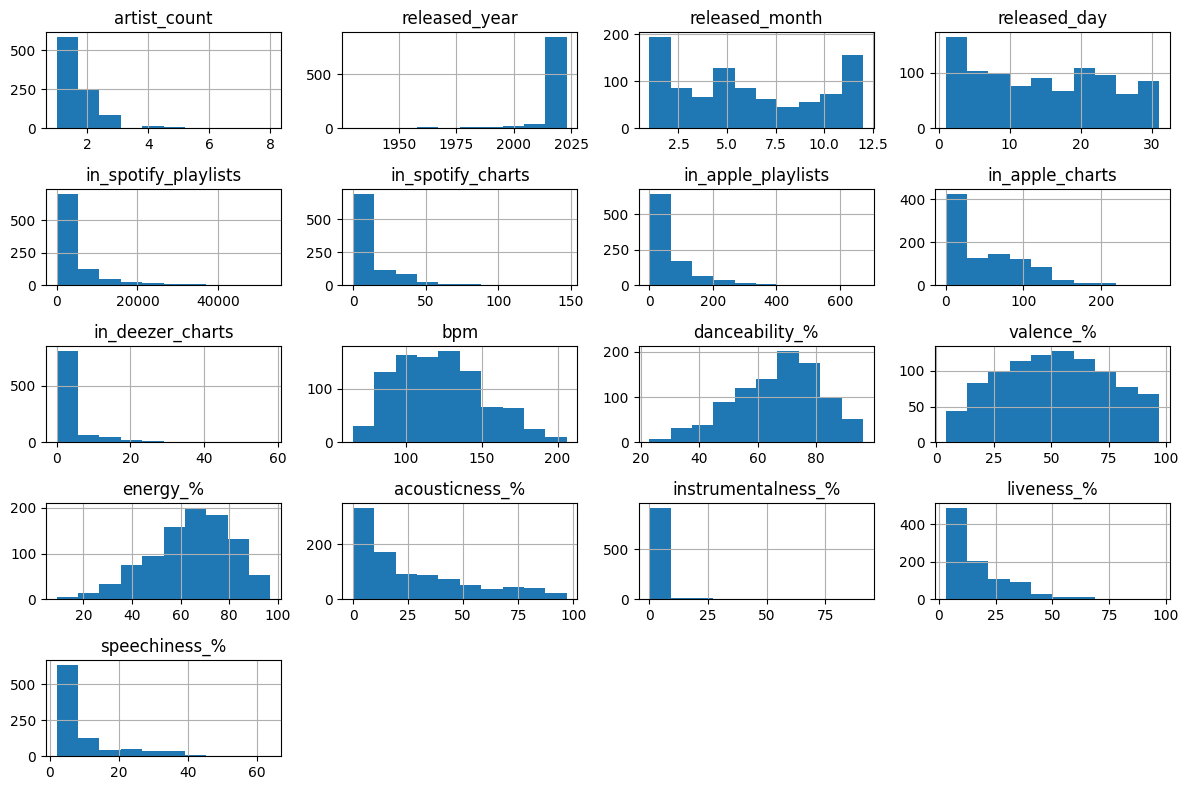

In [8]:
df.hist(figsize=(y,8))
plt.tight_layout()
plt.show()